In [1]:
import pandas as pd

In [5]:
diabetes = pd.read_csv('Data/pima-indians-diabetes.csv')

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


Try to predict class, IE diabetic Y/N (binary classification)

In [7]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [10]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max()-x.min()))

In [11]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [12]:
import tensorflow as tf

In [13]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [14]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [17]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Create a categorical column for this, since it's discontinuous. Here we manually specify the categories

In [19]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)
# Alternatively we can have TF generate the buckets for us from the data, up to a maximum of EG 10

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

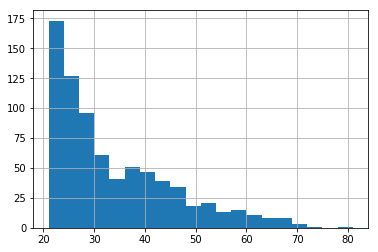

In [29]:
diabetes['Age'].hist(bins=20)

In [33]:
# Treating age as a categorical column
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [34]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [35]:
# Train test split

In [36]:
x_data = diabetes.drop('Class',axis=1)

In [38]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [39]:
labels = diabetes['Class']

In [41]:
labels.head

<bound method NDFrame.head of 0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64>

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [45]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [46]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Chris\\AppData\\Local\\Temp\\tmp42bbhc2a', '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_summary_steps': 100}


In [47]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Chris\AppData\Local\Temp\tmp42bbhc2a\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 552.309
INFO:tensorflow:step = 101, loss = 4.65453 (0.183 sec)
INFO:tensorflow:global_step/sec: 666.551
INFO:tensorflow:step = 201, loss = 5.25199 (0.149 sec)
INFO:tensorflow:global_step/sec: 614.99
INFO:tensorflow:step = 301, loss = 6.1498 (0.165 sec)
INFO:tensorflow:global_step/sec: 626.673
INFO:tensorflow:step = 401, loss = 5.87203 (0.160 sec)
INFO:tensorflow:global_step/sec: 642.283
INFO:tensorflow:step = 501, loss = 6.22228 (0.156 sec)
INFO:tensorflow:global_step/sec: 622.78
INFO:tensorflow:step = 601, loss = 3.70472 (0.161 sec)
INFO:tensorflow:global_step/sec: 624.25
INFO:tensorflow:step = 701, loss = 7.35122 (0.160 sec)
INFO:tensorflow:global_step/sec: 634.604
INFO:tensorflow:step = 801, loss = 4.92562 (0.158 sec)
INFO:tensorflow:global_step/sec: 631.387
INFO:t

In [48]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [50]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-08-22-21:41:08
INFO:tensorflow:Restoring parameters from C:\Users\Chris\AppData\Local\Temp\tmp42bbhc2a\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-08-22-21:41:09
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.799424, auc_precision_recall = 0.64052, average_loss = 0.525631, global_step = 1000, label/mean = 0.350649, loss = 5.0592, prediction/mean = 0.357727


In [51]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79942387,
 'auc_precision_recall': 0.6405201,
 'average_loss': 0.52563095,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0591979,
 'prediction/mean': 0.35772747}

In [52]:
# Do prediction here using the test data again, but we'd want some hold out data or new data normally
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [53]:
predictions = model.predict(pred_input_func)

In [54]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\Chris\AppData\Local\Temp\tmp42bbhc2a\model.ckpt-1000


In [55]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.51030827], dtype=float32),
  'logits': array([ 0.0412389], dtype=float32),
  'probabilities': array([ 0.48969173,  0.51030827], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.61634028], dtype=float32),
  'logits': array([ 0.47404313], dtype=float32),
  'probabilities': array([ 0.38365975,  0.61634028], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.36948484], dtype=float32),
  'logits': array([-0.5344274], dtype=float32),
  'probabilities': array([ 0.63051516,  0.36948487], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.31923717], dtype=float32),
  'logits': array([-0.75727963], dtype=float32),
  'probabilities': array([ 0.68076283,  0.31923717], dtype=float

In [56]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

# 3 layers of 10 neurons each. DNN, so each layer fully connected to adjacent layers

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Chris\\AppData\\Local\\Temp\\tmpoau9gy9o', '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_summary_steps': 100}


In [ ]:
dnn_model.train(input_fn=input_func, steps=1000) # Doesn't work, need to pass in to embedding columns

In [58]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4) # dim 4 because 4 possible vals

In [59]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree, embedded_group_col, age_buckets]
# swap our category col for the embedded group we've just created

In [60]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [61]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_model_dir': 'C:\\Users\\Chris\\AppData\\Local\\Temp\\tmpjmr0306k', '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_save_summary_steps': 100}


In [62]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Chris\AppData\Local\Temp\tmpjmr0306k\model.ckpt.
INFO:tensorflow:step = 1, loss = 9.44859
INFO:tensorflow:global_step/sec: 515.315
INFO:tensorflow:step = 101, loss = 4.72831 (0.195 sec)
INFO:tensorflow:global_step/sec: 611.39
INFO:tensorflow:step = 201, loss = 6.03454 (0.166 sec)
INFO:tensorflow:global_step/sec: 493.928
INFO:tensorflow:step = 301, loss = 6.21617 (0.209 sec)
INFO:tensorflow:global_step/sec: 449.588
INFO:tensorflow:step = 401, loss = 5.51125 (0.216 sec)
INFO:tensorflow:global_step/sec: 451.657
INFO:tensorflow:step = 501, loss = 6.38976 (0.219 sec)
INFO:tensorflow:global_step/sec: 588.949
INFO:tensorflow:step = 601, loss = 5.46324 (0.170 sec)
INFO:tensorflow:global_step/sec: 595.973
INFO:tensorflow:step = 701, loss = 3.54257 (0.169 sec)
INFO:tensorflow:global_step/sec: 579.578
INFO:tensorflow:step = 801, loss = 5.03546 (0.173 sec)
INFO:tensorflow:global_step/sec: 586.36
INFO

In [63]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [64]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2019-08-22-21:51:15
INFO:tensorflow:Restoring parameters from C:\Users\Chris\AppData\Local\Temp\tmpjmr0306k\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2019-08-22-21:51:15
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.833786, auc_precision_recall = 0.706039, average_loss = 0.481319, global_step = 1000, label/mean = 0.350649, loss = 4.6327, prediction/mean = 0.371725


{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83378589,
 'auc_precision_recall': 0.70603943,
 'average_loss': 0.48131901,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6326957,
 'prediction/mean': 0.37172484}

In [ ]:
# performance similar to 